# Prodigy InfoTech DS Task 2

Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

### Step 1: Data Cleaning

In [4]:
import pandas as pd

# Load the Titanic datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
gender_submission_df = pd.read_csv("gender_submission.csv")

# Display the first few rows of each dataset
train_head = train_df.head()
test_head = test_df.head()
gender_submission_head = gender_submission_df.head()

train_head, test_head, gender_submission_head


(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450   8.0500

In [5]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Check for missing values in the training dataset
missing_values = train_df.isnull().sum().sort_values(ascending=False)
missing_values[missing_values > 0]

Cabin       687
Age         177
Embarked      2
dtype: int64

In [7]:
# Drop 'Cabin' column
train_df.drop(columns='Cabin', inplace=True)

# Fill missing 'Age' with median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# Fill missing 'Embarked' with mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Recheck for missing values
train_df.isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_16668\4267339499.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_16668\4267339499.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Step 2: Exploratory Data Analysis (EDA)

Key Analyses to Perform:
1. Survival by Gender

2. Survival by Class (Pclass)

3. Survival by Age

4. Survival by Embarked Port

5. Correlation Heatmap

### Survival by Gender

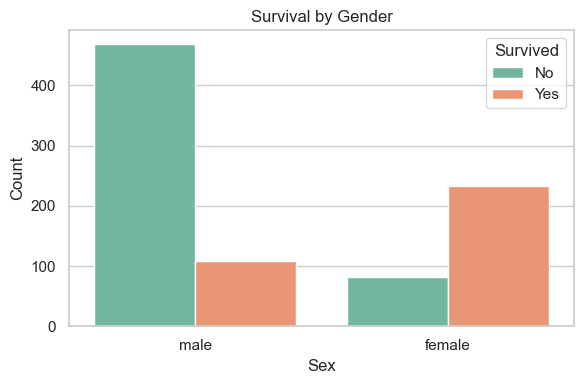

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Plot survival by gender
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='Sex', hue='Survived', palette='Set2')
plt.title('Survival by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

### Survival by Class (Pclass)

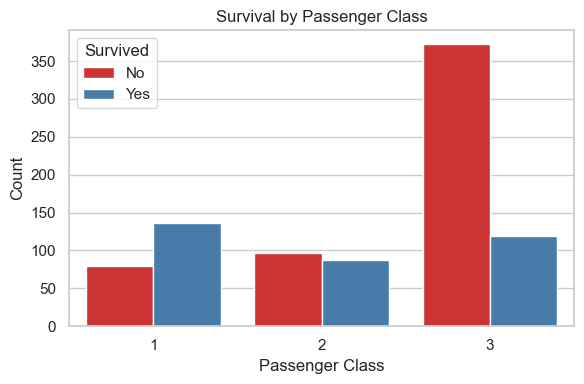

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='Pclass', hue='Survived', palette='Set1')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

### Survival by Age (with KDE or Histogram)

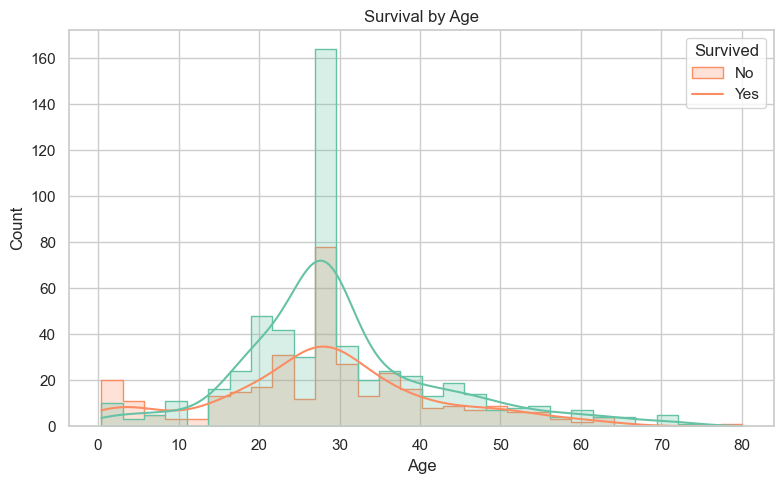

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='Age', hue='Survived', bins=30, kde=True, palette='Set2', element='step')
plt.title('Survival by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

### Survival by Embarked Port

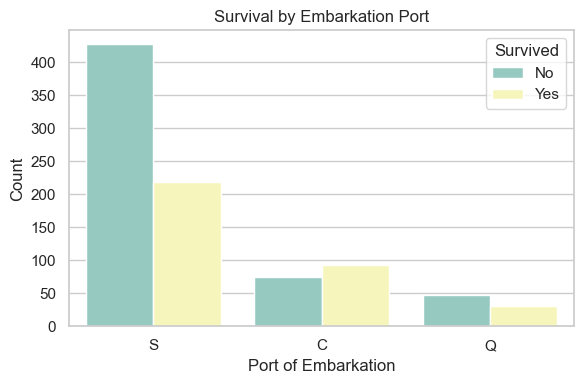

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='Embarked', hue='Survived', palette='Set3')
plt.title('Survival by Embarkation Port')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

### Correlation Heatmap

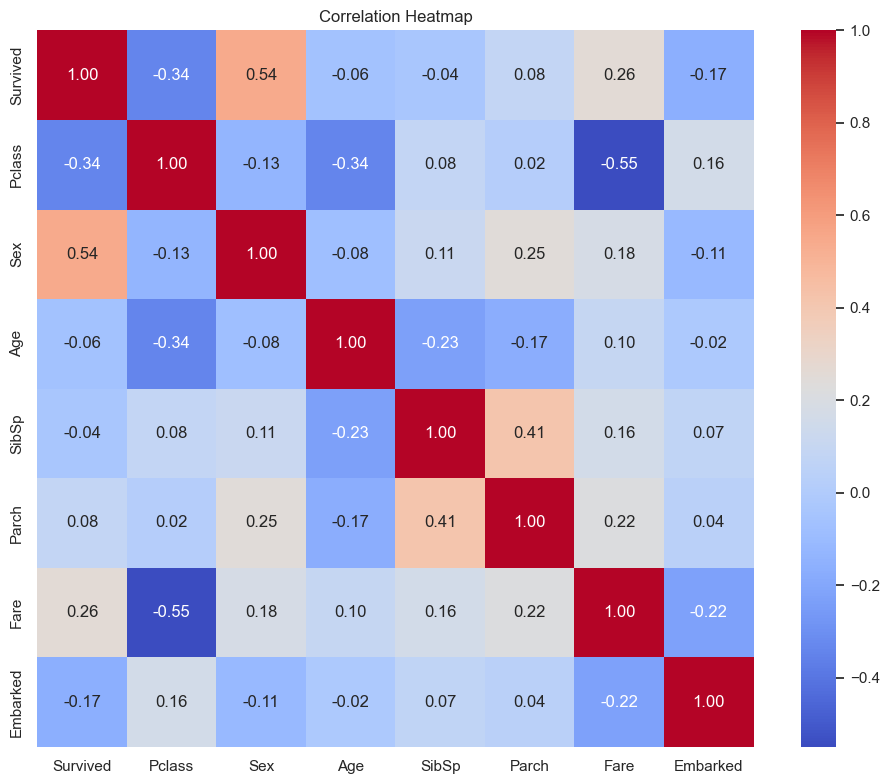

In [13]:
# Create a numeric copy of the DataFrame
df_corr = train_df.copy()

# Convert categorical columns to numeric
df_corr['Sex'] = df_corr['Sex'].map({'male': 0, 'female': 1})
df_corr['Embarked'] = df_corr['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Drop non-numeric columns
df_corr = df_corr.drop(columns=['Name', 'Ticket', 'PassengerId'])

# Compute and plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()